# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

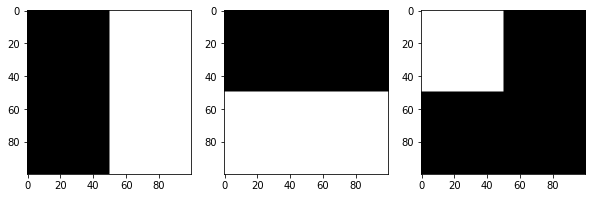

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


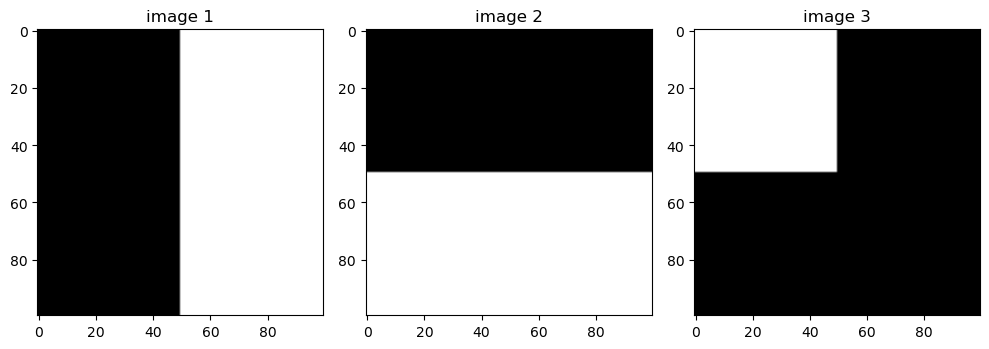

In [2]:
# solution
img1= np.zeros((100, 100))
img1[:, 50:] = 255  # Set right half to white , [top:bottom , right:left]

img2 = np.zeros((100, 100)) * 255
img2[50:] = 255  # Set the bottom half to white

img3 = np.zeros((100, 100))
img3[:50, :50] = 255
    
    # Plot the result
fig , axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(img1, cmap='gray')
axes[0].set_title('image 1')
#axes[0].axis("off")

axes[1].imshow(img2, cmap='gray')
axes[1].set_title('image 2')
#axes[1].axis("off")

axes[2].imshow(img3, cmap='gray')
axes[2].set_title('image 3')
#axes[2].axis("off")

    
plt.tight_layout()
plt.show()
    



*   Use the above three images to create the following image

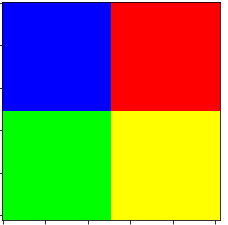
*Hint: Remember channels and color spaces*

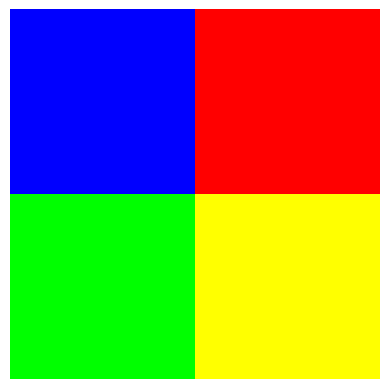

In [3]:
# solution
image = np.zeros((100, 100, 3), dtype=np.uint8)
image[:50, :50] = [0, 0, 255]
image[:50, 50:] = [255, 0, 0]
image[50:, :50] = [0, 255, 0]
image[50:, 50:] = [255, 255, 0]
plt.imshow(image)
plt.axis("off")
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

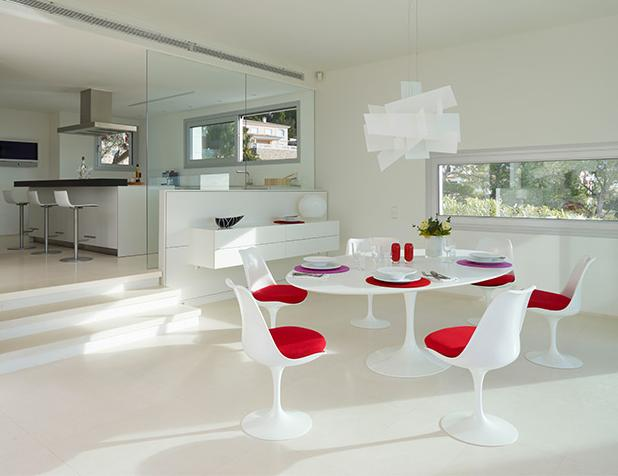

*   Extract individual channels and plot them using matplotlib subplot.



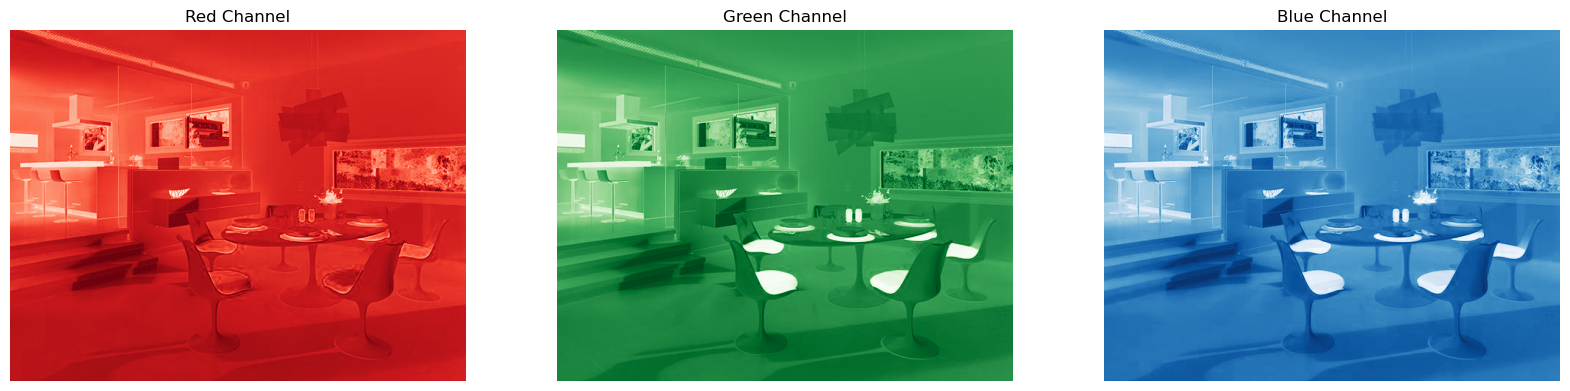

In [4]:
# solution
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/Users/la/Desktop/Lab-SAD/lab-computer-vision/images/sillas.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract individual channels
r_channel = image_rgb[:, :, 0]
g_channel = image_rgb[:, :, 1]
b_channel = image_rgb[:, :, 2]

# subplot
fig, axes = plt.subplots(1, 3, figsize=(20, 5))


# Display
axes[0].imshow(r_channel, cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(g_channel, cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(b_channel, cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

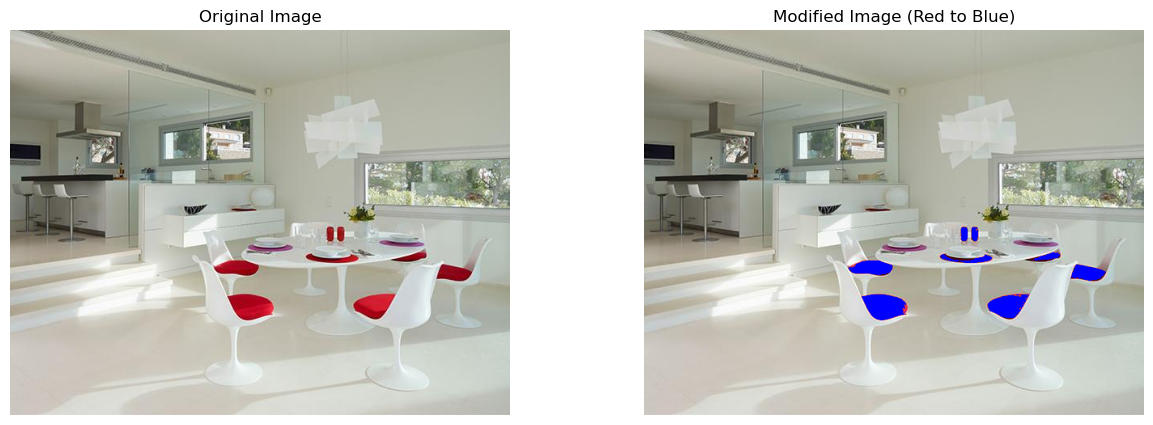

In [5]:
# solution
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the 'images' folder
image = cv2.imread('/Users/la/Desktop/Lab-SAD/lab-computer-vision/images/sillas.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

modified_image = image_rgb.copy()
modified_image[(modified_image[:, :, 0] > 100) & (modified_image[:, :, 1] < 60) & (modified_image[:, :, 2] < 60)] = [0, 0, 255]
# subplots 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Display 
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(modified_image)
axes[1].set_title('Modified Image (Red to Blue)')
axes[1].axis('off')
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

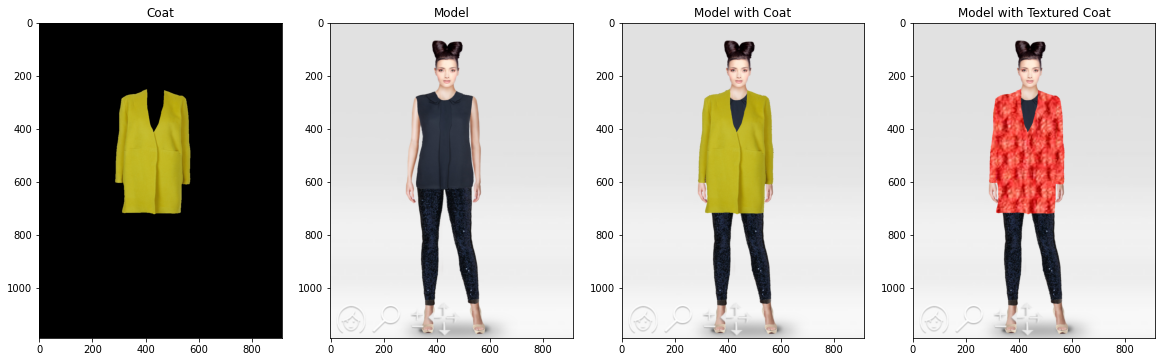

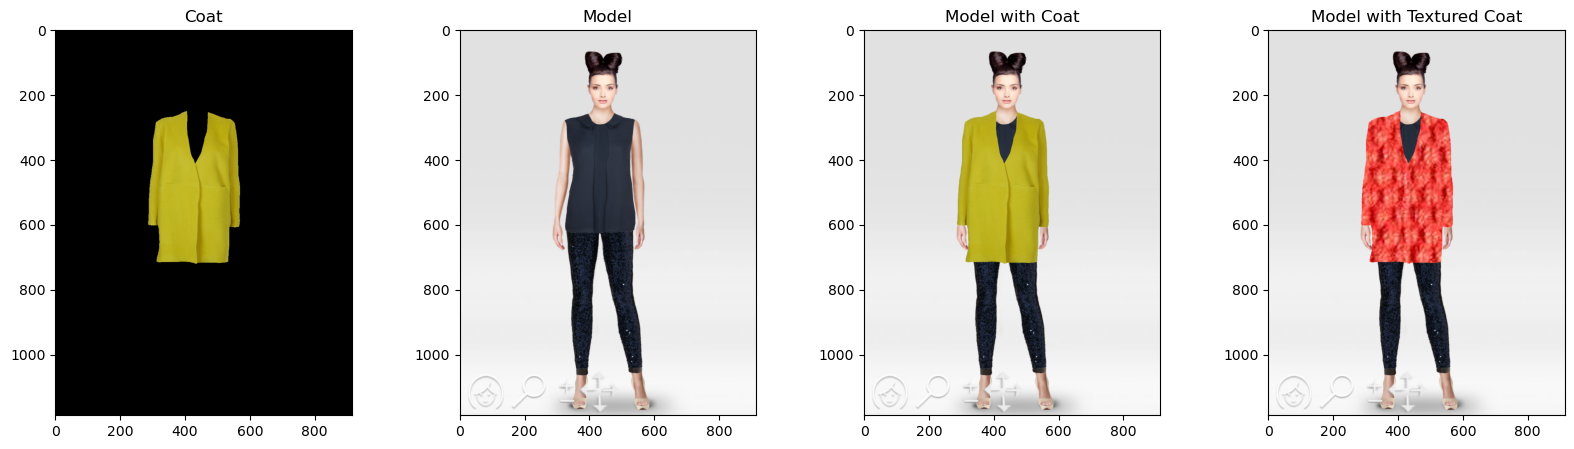

In [6]:
# solution
def overlay_coat(model_img, coat_img, texture_img):
    # Load images
    model = cv2.imread(model_img, cv2.IMREAD_UNCHANGED)
    coat = cv2.imread(coat_img, cv2.IMREAD_UNCHANGED)
    texture = cv2.imread(texture_img, cv2.IMREAD_UNCHANGED)
    
    # Convert BGR to RGB for Matplotlib
    model = cv2.cvtColor(model, cv2.COLOR_BGR2RGB)
    coat = cv2.cvtColor(coat, cv2.COLOR_BGR2RGB)
    texture = cv2.cvtColor(texture, cv2.COLOR_BGR2RGB)
    
    # Resize coat and texture to fit the model
    coat_resized = cv2.resize(coat, (model.shape[1], model.shape[0]))
    texture_resized = cv2.resize(texture, (coat_resized.shape[1], coat_resized.shape[0]))
    
    # Convert coat to grayscale and create a mask
    gray_coat = cv2.cvtColor(coat_resized, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(gray_coat, 50, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    
    # Apply texture to the coat
    coat_texture = cv2.bitwise_and(texture_resized, texture_resized, mask=mask)
    coat_bg = cv2.bitwise_and(coat_resized, coat_resized, mask=mask_inv)
    textured_coat = cv2.add(coat_texture, coat_bg)
    
    # Overlay the textured coat onto the model
    model_bg = cv2.bitwise_and(model, model, mask=mask_inv)
    final_output_textured = cv2.add(model_bg, textured_coat)
    final_output_plain = cv2.add(model_bg, coat_resized)
    
    return model, coat_resized, final_output_plain, final_output_textured

# File paths
model_image_path = '/Users/la/Desktop/Lab-SAD/lab-computer-vision/images/model.png'
coat_image_path =  '/Users/la/Desktop/Lab-SAD/lab-computer-vision/images/coat.png'
texture_image_path = '/Users/la/Desktop/Lab-SAD/lab-computer-vision/images/texture2.png'

# Process the images
model_img, coat_plain, output_plain, output_textured = overlay_coat(model_image_path, coat_image_path, texture_image_path)

# Plot images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(coat_plain)
axes[0].set_title("Coat")

axes[1].imshow(model_img)
axes[1].set_title("Model")

axes[2].imshow(output_plain)
axes[2].set_title("Model with Coat")

axes[3].imshow(output_textured)
axes[3].set_title("Model with Textured Coat")

plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




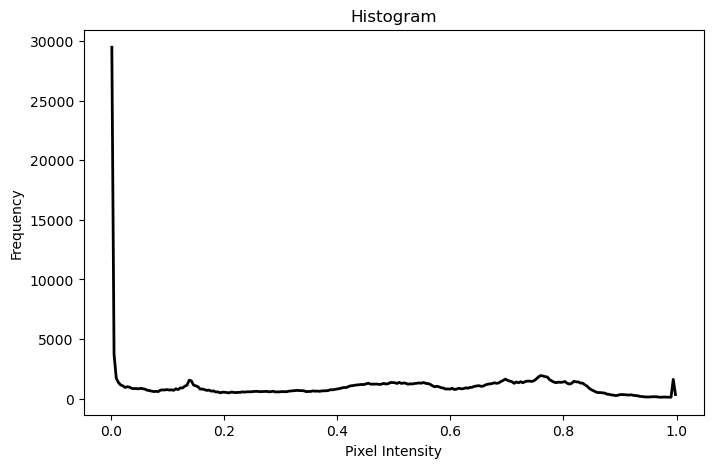

In [22]:
# solution
from skimage import data, color, exposure

#Load the astronaut image 
astronaut_image = data.astronaut()

#Convert the image to grayscale.
gray_astronaut = color.rgb2gray(astronaut_image)

#Compute the histogram of the image.
hist, bin_centers = exposure.histogram(gray_astronaut)

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.plot(bin_centers, hist, color='black', lw=2)  
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

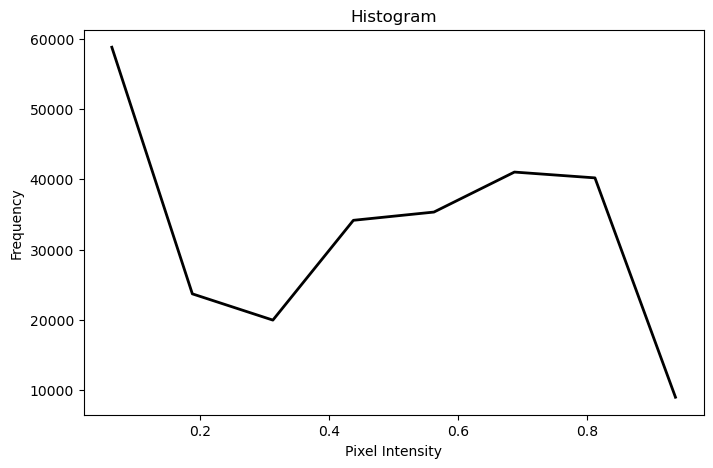

In [23]:
# solution
hist, bin_centers = exposure.histogram(gray_astronaut, nbins=8)

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.plot(bin_centers, hist, color='black', lw=2)  
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*Changing bin count affects histogram detail—low bins merge intensities, high bins capture fine variations, and the ideal count balances detail and noise (typically 32-64).*



*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


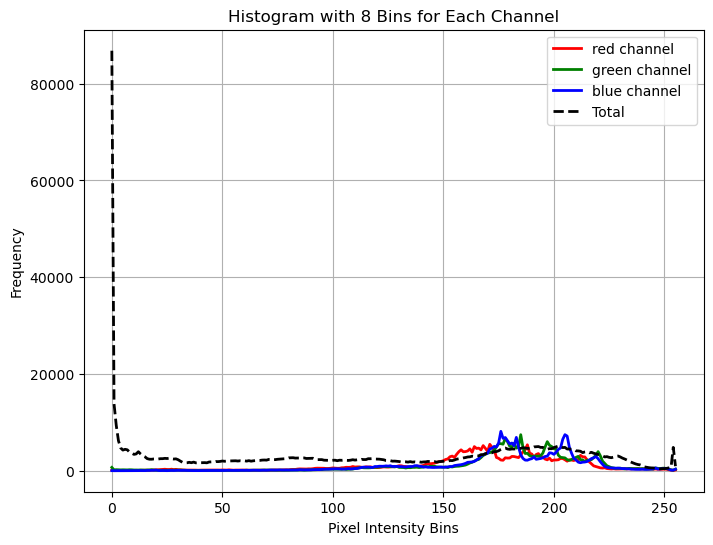

In [26]:
# solution
colors = ('red', 'green', 'blue')
hist_data = {}

plt.figure(figsize=(8, 6))
for i, color in enumerate(colors):
    hist, bin_centers = exposure.histogram(image[..., i], nbins=8)
    plt.plot(bin_centers, hist, color=color, linewidth=2, label=f'{color} channel')
    hist_data[color] = hist

hist_total, bin_centers_total = exposure.histogram(astronaut_image, nbins=8)
plt.plot(bin_centers_total, hist_total, color='black', linestyle='dashed', linewidth=2, label='Total')

# Plot histogram
plt.title('Histogram with 8 Bins for Each Channel')
plt.xlabel('Pixel Intensity Bins')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



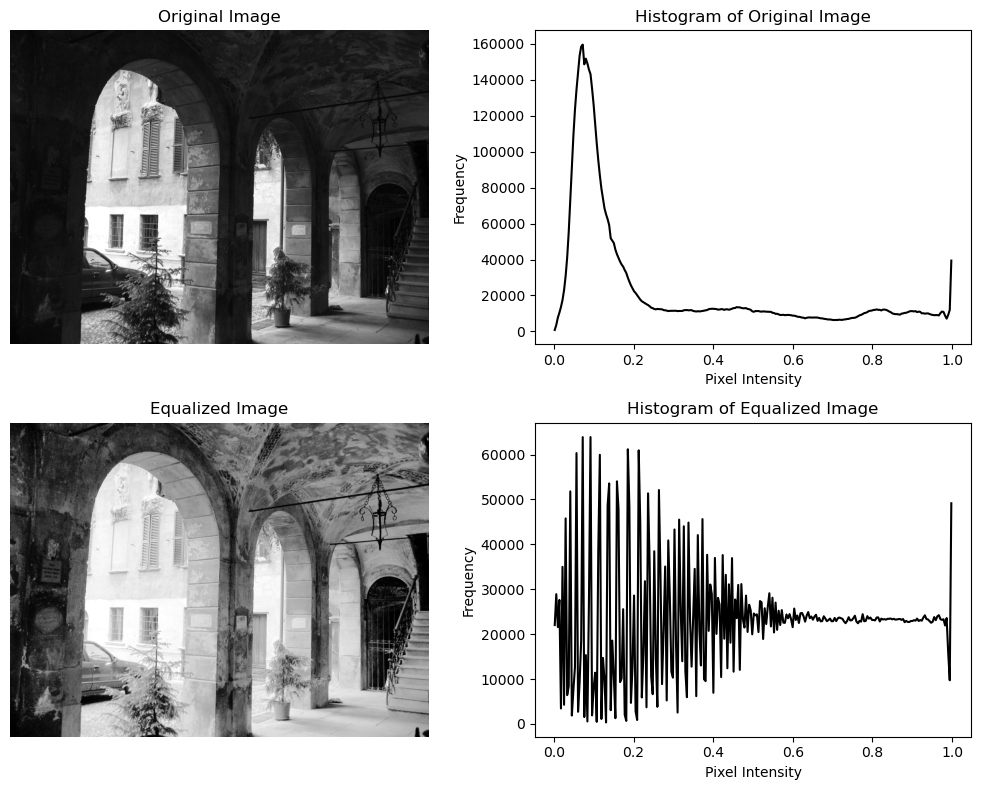

In [41]:
# solution
from skimage import io, color, exposure

#Read image
aquatermi = io.imread('/Users/la/Desktop/Lab-SAD/lab-computer-vision/images/aquatermi_lowcontrast.jpg')

# convert to grayscale
gray_aquatermi = color.rgb2gray(aquatermi)

# compute the histogram 
hist_orig, bin_centers_orig = exposure.histogram(gray_aquatermi)

aquat_equalized = exposure.equalize_hist(gray_aquatermi)

# Compute histogram of the equalized image
hist_eq, bin_centers_eq = exposure.histogram(aquat_equalized)

# Plot results in a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Show original image
axes[0, 0].imshow(gray_aquatermi, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Show histogram of original image
axes[0, 1].plot(bin_centers_orig, hist_orig, color='black')
axes[0, 1].set_title('Histogram of Original Image')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Show equalized image
axes[1, 0].imshow(aquat_equalized, cmap='gray')
axes[1, 0].set_title('Equalized Image')
axes[1, 0].axis('off')

# Show histogram of equalized image
axes[1, 1].plot(bin_centers_eq, hist_eq, color='black')
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*Histogram equalization redistributes pixel intensities using CDF for uniform contrast enhancement, while linear contrast stretching scales intensities linearly between a defined min-max range without altering their distribution.*


### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



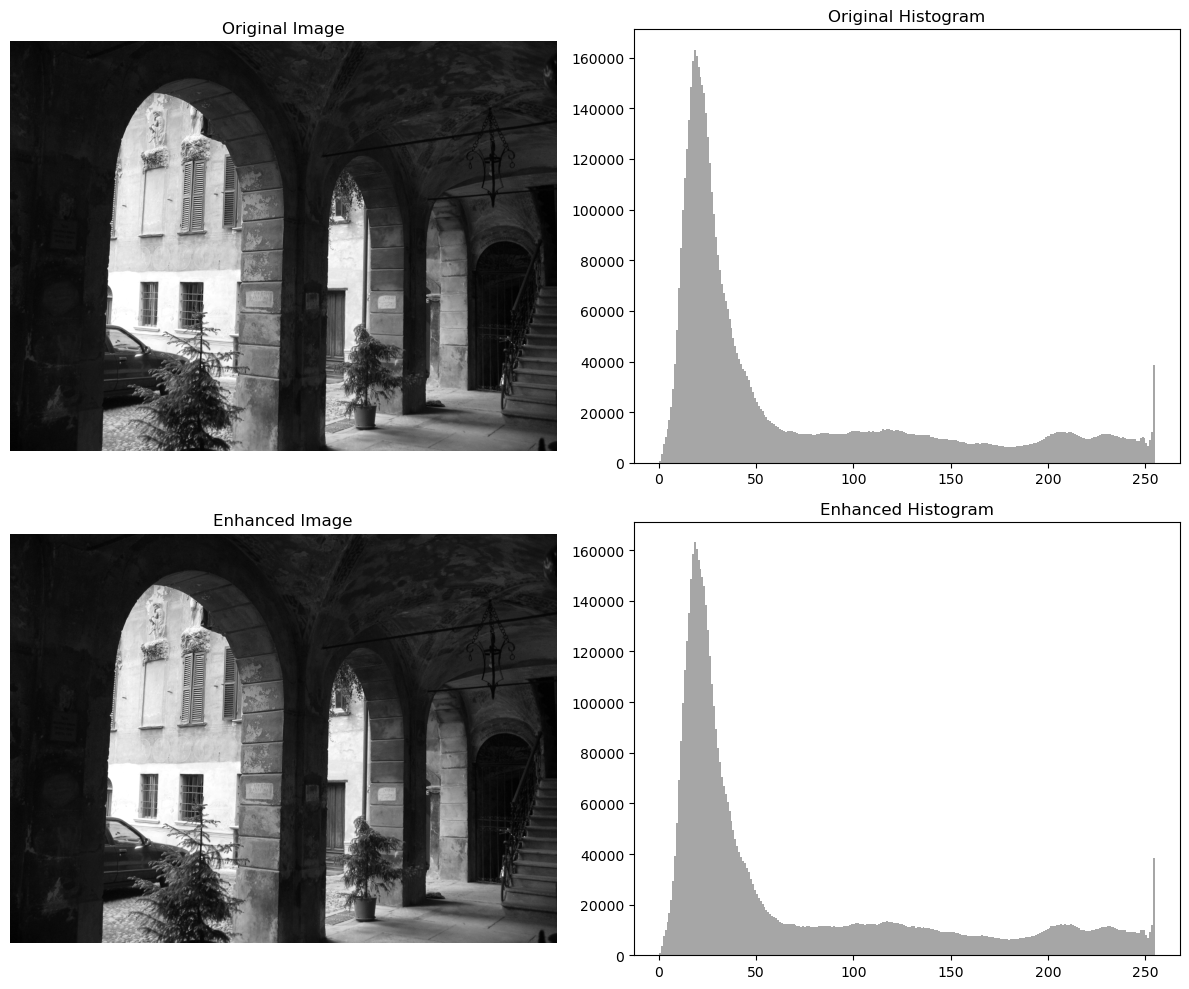

In [42]:
# solution
def linear_contrast_stretch(image):
    # Manually find min and max pixel values
    min_pixel = 255
    max_pixel = 0
    for row in image:
        for pixel in row:
            if pixel < min_pixel:
                min_pixel = pixel
            if pixel > max_pixel:
                max_pixel = pixel

    # Avoid division by zero if all pixels are the same
    if min_pixel == max_pixel:
        return image.copy()

    # Manually apply contrast stretch transformation
    stretched_image = np.zeros_like(image, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            stretched_image[i, j] = int((image[i, j] - min_pixel) * (255 / (max_pixel - min_pixel)))

    return stretched_image

def plot_results(original_image, enhanced_image, bins=256):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plot original image
    axes[0, 0].imshow(original_image, cmap='gray')
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis("off")

    # Plot original histogram
    axes[0, 1].hist(original_image.flatten(), bins=bins, color='gray', alpha=0.7)
    axes[0, 1].set_title("Original Histogram")

    # Plot enhanced image
    axes[1, 0].imshow(enhanced_image, cmap='gray')
    axes[1, 0].set_title("Enhanced Image")
    axes[1, 0].axis("off")

    # Plot enhanced histogram
    axes[1, 1].hist(enhanced_image.flatten(), bins=bins, color='gray', alpha=0.7)
    axes[1, 1].set_title("Enhanced Histogram")

    plt.tight_layout()
    plt.show()

# Load image
image_path = '/Users/la/Desktop/Lab-SAD/lab-computer-vision/images/aquatermi_lowcontrast.jpg'  
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  

# Apply linear contrast stretching
enhanced_image = linear_contrast_stretch(original_image)

# Plot results
plot_results(original_image, enhanced_image, bins=256)




# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




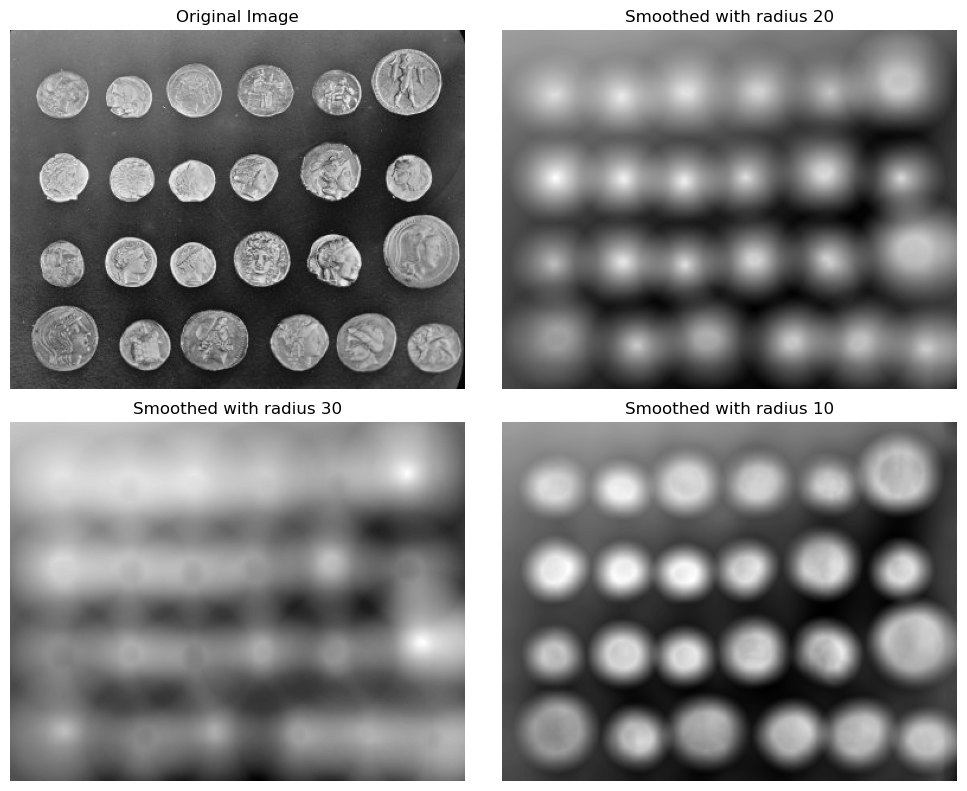

In [45]:
# solution
from skimage import data, filters, morphology
from skimage.filters import rank

#load
coins_data =data.coins()

#Define a disk
selem_20 = morphology.disk(20)

#Apply the mean filter
smoothed_20 = filters.rank.mean(coins_data, selem_20)

#Increase the radius of the selem by 10 and apply the mean filter
selem_30 = morphology.disk(30)
smoothed_30 = filters.rank.mean(coins_data, selem_30)

# Reduce the radius of the selem by 10 and apply the mean filter.
selem_10 = morphology.disk(10)
smoothed_10 = filters.rank.mean(coins_data, selem_10)

#plot 
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].imshow(coins_data, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(smoothed_20, cmap='gray')
axes[0, 1].set_title("Smoothed with radius 20")
axes[0, 1].axis('off')

axes[1, 0].imshow(smoothed_30, cmap='gray')
axes[1, 0].set_title("Smoothed with radius 30")
axes[1, 0].axis('off')

axes[1, 1].imshow(smoothed_10, cmap='gray')
axes[1, 1].set_title("Smoothed with radius 10")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

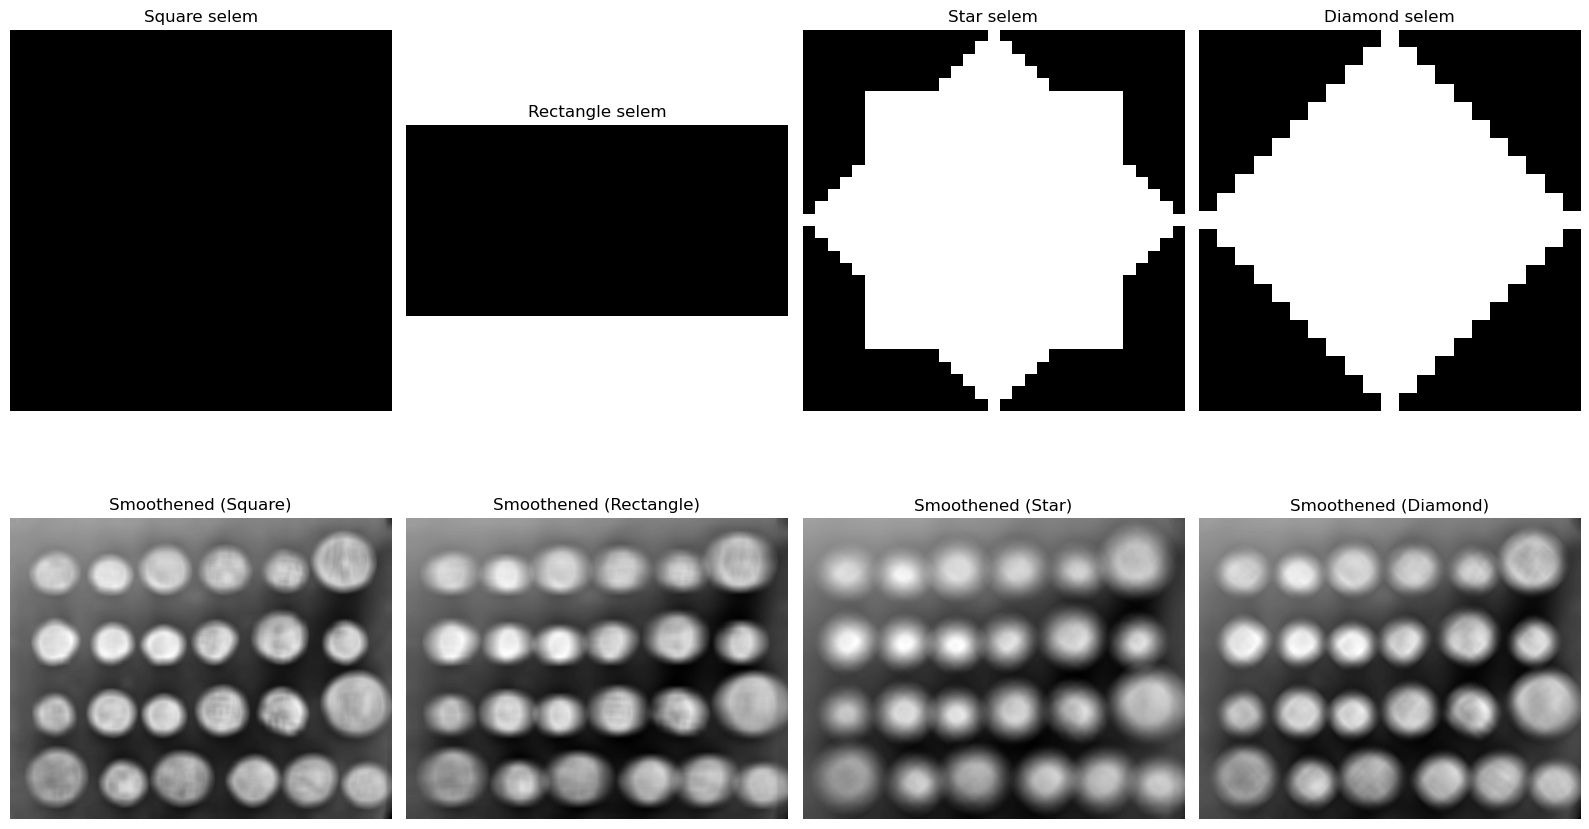

In [46]:
# solution
selem_square = morphology.square(10)
selem_rectangle = morphology.rectangle(10, 20)
selem_star = morphology.star(10)
selem_diamond = morphology.diamond(10)

# Apply the mean filter using each selem
smoothed_square = filters.rank.mean(coins_data, selem_square)
smoothed_rectangle = filters.rank.mean(coins_data, selem_rectangle)
smoothed_star = filters.rank.mean(coins_data, selem_star)
smoothed_diamond = filters.rank.mean(coins_data, selem_diamond)

# Create a 2 x 4 subplot to display the results
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

# plot 
axes[0, 0].imshow(selem_square, cmap='gray')
axes[0, 0].set_title("Square selem")
axes[0, 0].axis('off')
axes[1, 0].imshow(smoothed_square, cmap='gray')
axes[1, 0].set_title("Smoothened (Square)")
axes[1, 0].axis('off')

axes[0, 1].imshow(selem_rectangle, cmap='gray')
axes[0, 1].set_title("Rectangle selem")
axes[0, 1].axis('off')
axes[1, 1].imshow(smoothed_rectangle, cmap='gray')
axes[1, 1].set_title("Smoothened (Rectangle)")
axes[1, 1].axis('off')

axes[0, 2].imshow(selem_star, cmap='gray')
axes[0, 2].set_title("Star selem")
axes[0, 2].axis('off')
axes[1, 2].imshow(smoothed_star, cmap='gray')
axes[1, 2].set_title("Smoothened (Star)")
axes[1, 2].axis('off')

axes[0, 3].imshow(selem_diamond, cmap='gray')
axes[0, 3].set_title("Diamond selem")
axes[0, 3].axis('off')
axes[1, 3].imshow(smoothed_diamond, cmap='gray')
axes[1, 3].set_title("Smoothened (Diamond)")
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()



*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*Increasing the radius of the disk structuring element results in stronger smoothing, blurring more details*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

* - Square selem will likely create uniform smoothing in all directions.
  - Rectangle selem may stretch the smoothing effect more horizontally.
  - Star selem will produce a unique smoothing pattern that might emphasize certain directions.
  - Diamond selem will likely produce smoother results along the diagonals.
    *

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

* The mean filter applies uniform averaging to the neighborhood, leading to equal smoothing in all directions, which can blur edges,used in basic noise reduction, especially for salt-and-pepper noise.
* The Gaussian filter applies weighted averaging, with more influence from nearby pixels, preserving edges better and offering a softer blur, Used for smoothing, edge preservation, and reducing Gaussian noise.



...